<a href="https://colab.research.google.com/github/thegayankalinga/see_model_implementation/blob/main/see_implementation_phase01_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase 1: Data Exploration and Preprocessing

In [ ]:
# Check GPU availability
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
import gc
import os
from psutil import Process

In [ ]:
# Monitor memory usage
from psutil import virtual_memory
def print_memory_usage():
    ram_gb = virtual_memory().total / 1e9
    ram_percent = virtual_memory().percent
    print(f'RAM Usage: {ram_percent:.1f}% of {ram_gb:.1f} GB')


### 1. Data Loading with optimized settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import userdata
dataset_path =    userdata.get('dataset_path')

In [ ]:
@tf.function
def gpu_accelerated_processing(data):
    """Perform GPU-accelerated operations if needed"""
    return tf.identity(data)

print("1. Loading the dataset...")
print_memory_usage()

df = pd.read_csv(f"{dataset_path}/project_mandays_calculations50k_augmented.csv",
                 dtype={
                     'region': 'category',
                     'dev_environment': 'category',
                     'sit_environment': 'category',
                     'uat_environment': 'category',
                     'staging_environment': 'category',
                     'training_environment': 'category',
                     'production_environment': 'category',
                     'dr_environment': 'category',
                     'compliance_pci_sff': 'category',
                     'compliance_country_specific': 'category',
                     'backend_technology': 'category',
                     'frontend_technology': 'category',
                     'mobile_technology': 'category',
                     'database': 'category',
                     'infrastructure_type': 'category'
                 })
print(f"Dataset shape: {df.shape}")


1. Loading the dataset...
RAM Usage: 17.5% of 13.6 GB
Dataset shape: (50000, 46)


###  2. Memory Usage Optimization

In [ ]:
# # 2. Memory Usage Optimization for Colab
# def reduce_mem_usage(df):
#     start_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

#     for col in tqdm(df.columns, desc="Optimizing memory usage"):
#         col_type = df[col].dtype

#         if col_type != object and col_type != 'category':
#             c_min = df[col].min()
#             c_max = df[col].max()

#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)

#     end_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#     print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
#     return df

# df = reduce_mem_usage(df)

# # Clear memory
# import gc
# gc.collect()
# print_memory_usage()

### 3. Initial Data Exploration

In [ ]:
print("\n3. Initial data exploration")
print("\nData info:")
print(df.info())

print("\nBasic statistics for numerical columns:")
print(df.describe())



3. Initial data exploration

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   region                         50000 non-null  category
 1   dev_environment                50000 non-null  category
 2   sit_environment                50000 non-null  category
 3   uat_environment                50000 non-null  category
 4   staging_environment            50000 non-null  category
 5   training_environment           50000 non-null  category
 6   production_environment         50000 non-null  category
 7   dr_environment                 50000 non-null  category
 8   compliance_pci_sff             50000 non-null  category
 9   compliance_country_specific    50000 non-null  category
 10  backend_technology             50000 non-null  category
 11  frontend_technology            50000 non-null  categ

### 4. Missing Value Analysis

In [ ]:
print("\n4. Missing value analysis")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
print("\nMissing values percentage per column:")
print(missing_percentages[missing_percentages > 0])


4. Missing value analysis

Missing values percentage per column:
Series([], dtype: float64)


### 5. Feature Analysis

In [ ]:
numerical_cols = df.select_dtypes(include=['int8', 'int16', 'int32', 'float16', 'float32', 'float64']).columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns


### 6. Target Variable Analysis

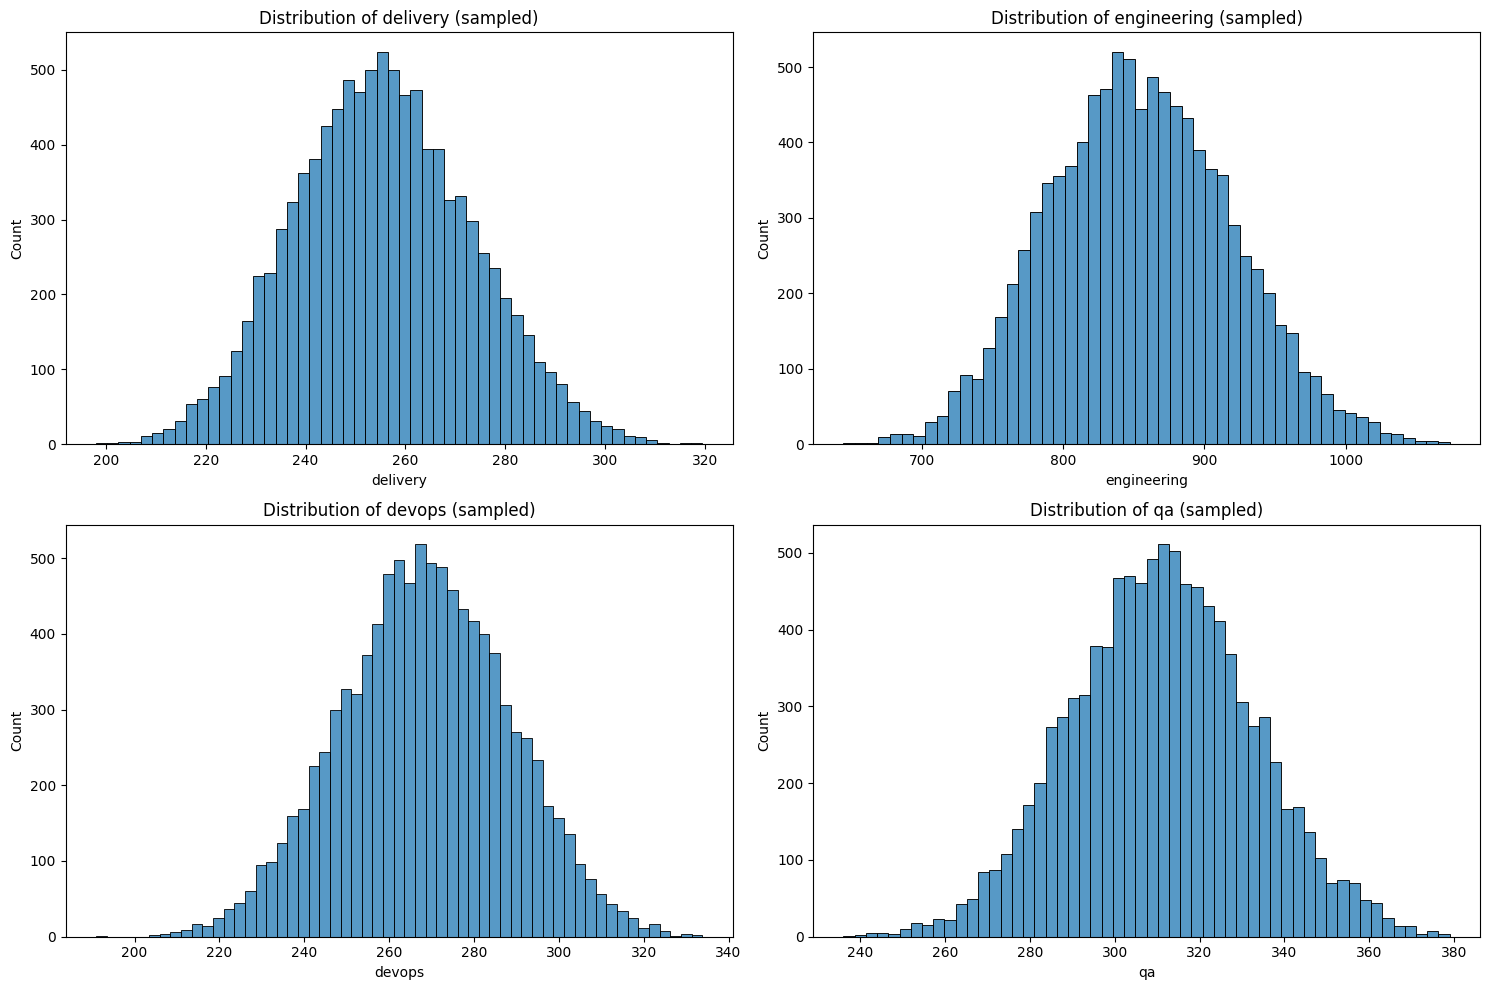

In [ ]:
target_vars = ['delivery', 'engineering', 'devops', 'qa']

# Using more efficient plotting for large dataset
plt.figure(figsize=(15, 10))
for i, target in enumerate(target_vars, 1):
    plt.subplot(2, 2, i)
    # Use bins='auto' for automatic bin size selection
    sns.histplot(data=df[target].sample(n=min(10000, len(df))), bins='auto')
    plt.title(f'Distribution of {target} (sampled)')
plt.tight_layout()
plt.show()

### 7. Correlation Analysis (using sampling for large dataset)

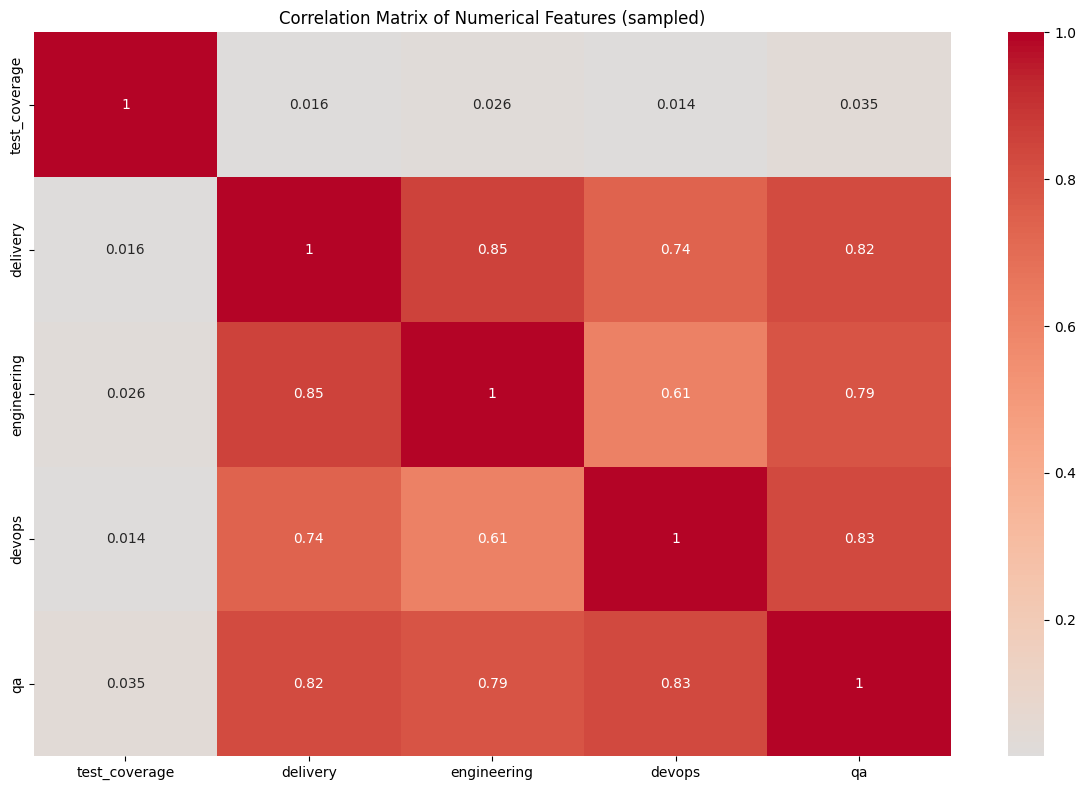

In [ ]:
sample_size = min(10000, len(df))
sampled_df = df.sample(n=sample_size, random_state=42)
numerical_df = sampled_df[numerical_cols]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features (sampled)')
plt.tight_layout()
plt.show()

### 8. Data Preprocessing

In [ ]:
print("\n8. Data preprocessing")


8. Data preprocessing


#### 8.1 Handle missing values

In [ ]:
print("\n8.1 Handling missing values...")
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


8.1 Handling missing values...


#### 8.2 Encode categorical variables


In [ ]:
print("\n8.2 Encoding categorical variables...")
label_encoders = {}
for col in categorical_cols:
    if col != 'project_name':
        label_encoders[col] = LabelEncoder()
        df[col + '_encoded'] = label_encoders[col].fit_transform(df[col])



8.2 Encoding categorical variables...


#### 8.3 Feature scaling


In [ ]:
print("\n8.3 Scaling numerical features...")
scaler = StandardScaler()
numerical_features = df[numerical_cols].copy()
scaled_features = scaler.fit_transform(numerical_features)
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols)



8.3 Scaling numerical features...


#### 8.4 Prepare final dataset

In [ ]:
print("\n8.4 Preparing final dataset...")
encoded_categorical_cols = [col + '_encoded' for col in categorical_cols if col != 'project_name']
final_df = pd.concat([scaled_df, df[encoded_categorical_cols]], axis=1)

for target in target_vars:
    final_df[target] = df[target]



8.4 Preparing final dataset...


### 9. Train-Validation-Test Split


In [ ]:
print("\n9. Preparing train-validation-test split...")
X = final_df.drop(target_vars, axis=1)
y = final_df[target_vars]

# Split proportions: 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42  # 0.176 of 85% is 15% of total
)

print("\nData split sizes:")
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")



9. Preparing train-validation-test split...

Data split sizes:
Training set: 35020 samples (70.0%)
Validation set: 7480 samples (15.0%)
Test set: 7500 samples (15.0%)


### 10. Data Augmentation

In [ ]:
import gc
import os
from psutil import Process

def print_memory_usage():
    """Print current memory usage of the process"""
    process = Process(os.getpid())
    print(f"Current memory usage: {process.memory_info().rss / 1024 / 1024:.2f} MB")

def augment_data(X, y, num_augmented_samples=10000, batch_size=1000):
    """
    Memory-efficient data augmentation using batches
    """
    print("Starting data augmentation...")
    print_memory_usage()

    X_aug_list, y_aug_list = [], []
    samples_per_technique = num_augmented_samples // 3

    # Process in batches
    for start_idx in range(0, samples_per_technique, batch_size):
        batch_size_current = min(batch_size, samples_per_technique - start_idx)

        # 1. Gaussian noise addition (batch processing)
        print(f"\rProcessing Gaussian noise batch {start_idx//batch_size + 1}/{(samples_per_technique + batch_size - 1)//batch_size}", end="")
        noise_scale = 0.05

        # Process X noise in batch
        X_batch = X.values[:batch_size_current]
        noise = np.random.normal(0, noise_scale, X_batch.shape)
        X_noisy = X_batch + noise

        # Process y noise in batch
        y_batch = y.values[:batch_size_current]
        y_noise = np.random.normal(0, noise_scale, y_batch.shape)
        y_noisy = y_batch * (1 + y_noise)

        X_aug_list.append(X_noisy)
        y_aug_list.append(y_noisy)

        # Clear memory
        del noise, X_noisy, y_noise, y_noisy
        gc.collect()

    print("\nGaussian noise augmentation completed")
    print_memory_usage()

    # 2. Synthetic effort variations (batch processing)
    for start_idx in range(0, samples_per_technique, batch_size):
        batch_size_current = min(batch_size, samples_per_technique - start_idx)
        print(f"\rProcessing effort variations batch {start_idx//batch_size + 1}/{(samples_per_technique + batch_size - 1)//batch_size}", end="")

        X_batch = X.values[:batch_size_current]
        y_batch = y.values[:batch_size_current]
        effort_scale = np.random.uniform(0.9, 1.1, (batch_size_current,) + y_batch.shape[1:])

        X_aug_list.append(X_batch)
        y_aug_list.append(y_batch * effort_scale)

        del effort_scale
        gc.collect()

    print("\nEffort variations augmentation completed")
    print_memory_usage()

    # 3. Feature combination (batch processing)
    X_len = len(X)
    for start_idx in range(0, samples_per_technique, batch_size):
        batch_size_current = min(batch_size, samples_per_technique - start_idx)
        print(f"\rProcessing feature combinations batch {start_idx//batch_size + 1}/{(samples_per_technique + batch_size - 1)//batch_size}", end="")

        X_combined_batch = []
        y_combined_batch = []

        for _ in range(batch_size_current):
            idx1, idx2 = np.random.randint(0, X_len, 2)
            weight = np.random.uniform(0.3, 0.7)

            X_combined = X.values[idx1] * weight + X.values[idx2] * (1 - weight)
            y_combined = y.values[idx1] * weight + y.values[idx2] * (1 - weight)

            X_combined_batch.append(X_combined)
            y_combined_batch.append(y_combined)

        X_aug_list.append(np.array(X_combined_batch))
        y_aug_list.append(np.array(y_combined_batch))

        del X_combined_batch, y_combined_batch
        gc.collect()

    print("\nFeature combinations augmentation completed")
    print_memory_usage()

    # Combine all augmented data
    print("\nCombining augmented data...")
    X_augmented = pd.DataFrame(np.vstack(X_aug_list), columns=X.columns)
    y_augmented = pd.DataFrame(np.vstack(y_aug_list), columns=y.columns)

    # Clear memory
    del X_aug_list, y_aug_list
    gc.collect()

    print("Data augmentation completed")
    print_memory_usage()

    return X_augmented.reset_index(drop=True), y_augmented.reset_index(drop=True)

# Set random seed for reproducibility
np.random.seed(42)

print("\nStarting data augmentation process...")
X_train_aug, y_train_aug = augment_data(X_train, y_train, batch_size=500)  # Smaller batch size for T4
print(f"Original training set size: {len(X_train)}")
print(f"Augmented training set size: {len(X_train_aug)}")


Starting data augmentation process...
Starting data augmentation...
Current memory usage: 1001.20 MB
Processing Gaussian noise batch 7/7
Gaussian noise augmentation completed
Current memory usage: 1001.20 MB
Processing effort variations batch 7/7
Effort variations augmentation completed
Current memory usage: 1017.30 MB
Processing feature combinations batch 7/7
Feature combinations augmentation completed
Current memory usage: 1033.40 MB

Combining augmented data...
Data augmentation completed
Current memory usage: 1033.40 MB
Original training set size: 35020
Augmented training set size: 9999


### 11. Save processed data


In [ ]:
from google.colab import userdata
save_path =    userdata.get('save_path')

# Save in batches
print("Saving original processed data...")
for name, data in [
    ('X_train', X_train), ('y_train', y_train),
    ('X_val', X_val), ('y_val', y_val),
    ('X_test', X_test), ('y_test', y_test)
]:
    np.save(f'{save_path}{name}.npy', data)
print("Original processed data saved")

# Save augmented data in batches
print("Saving augmented data...")
for name, data in [
    ('X_train_aug', X_train_aug), ('y_train_aug', y_train_aug),
    ('X_val', X_val), ('y_val', y_val),
    ('X_test', X_test), ('y_test', y_test)
]:
    np.save(f'{save_path}aug_{name}.npy', data)
print("Augmented data saved")

# Save data info
with open(f'{save_path}data_info.txt', 'w') as f:
    f.write("Dataset Information:\n")
    f.write(f"Original training samples: {len(X_train)}\n")
    f.write(f"Augmented training samples: {len(X_train_aug)}\n")
    f.write(f"Validation samples: {len(X_val)}\n")
    f.write(f"Test samples: {len(X_test)}\n")
    f.write("\nFeature columns:\n")
    for col in X_train.columns:
        f.write(f"- {col}\n")
    f.write("\nTarget columns:\n")
    for col in y_train.columns:
        f.write(f"- {col}\n")

print("\nAll data saved to:", save_path)
print_memory_usage()

# Final cleanup
del X_train_aug, y_train_aug
gc.collect()
print("\nPreprocessing completed successfully!")
print_memory_usage()

Saving original processed data...
Original processed data saved
Saving augmented data...
Augmented data saved

All data saved to: /content/drive/MyDrive/Projects/msc_project/working_data/
Current memory usage: 1001.53 MB

Preprocessing completed successfully!
Current memory usage: 1001.53 MB
